<a href="https://colab.research.google.com/github/admers/ANGULAR/blob/master/svm_como_clasificador_multiclase_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

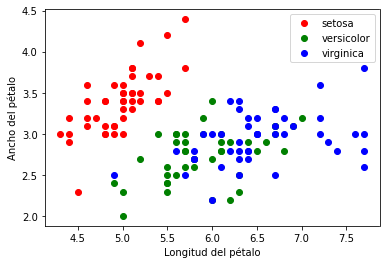

prediccion:  0
Exactitud:  0.8


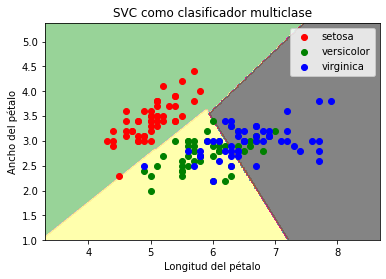

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn import svm

svc = svm.SVC()
iris = datasets.load_iris()
X=iris.data[:,[0,1]] 
y=iris.target 
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y,test_size=0.1, random_state=1) 
colors = ['red','green','blue'] 
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
  plt.scatter(X_ent[y_ent==i, 0], X_ent[y_ent==i, 1], color=color, label=target) 
plt.xlabel('Longitud del pétalo') 
plt.ylabel('Ancho del pétalo') 
plt.legend(loc='best')
plt.show()

C=1 
clf = SVC(kernel='linear', C=C).fit(X, y) 
titulo = 'SVC como clasificador multiclase' 
x_min, x_max=X_ent[:,0].min()-1, X_ent[:, 0].max() + 1 
y_min, y_max = X_ent[:, 1].min()-1, X_ent[:, 1].max()+1 
h=(x_max/x_min)/100 
xx, yy = np.meshgrid (np.arange(x_min, x_max, h), 
                      np.arange(y_min, y_max, h)) 
Z= clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z=Z.reshape(xx.shape) 
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8) 

colors = ['red','green', 'blue'] 
for color, i, target in zip(colors, [0, 1, 2], iris.target_names): 
  plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target) 
  plt.xlabel('Longitud del pétalo') 
  plt.ylabel('Ancho del pétalo') 
  plt.title(titulo) 
  plt.legend(loc='best', shadow=False, scatterpoints=1)



prueba =[[5,4]]
pred=clf.predict(prueba)
print("prediccion: ",pred[0])# 0 =setosa

exact=clf.score(X_pru,y_pru)
print("Exactitud: ",exact)

cambiando C el hiperparametro ,para ver como se comporta la imagen,como ultimo disminuye a medida ,mientras vamos aumentando C,enfocandose mas en la clasificacion correcta en los puntos.

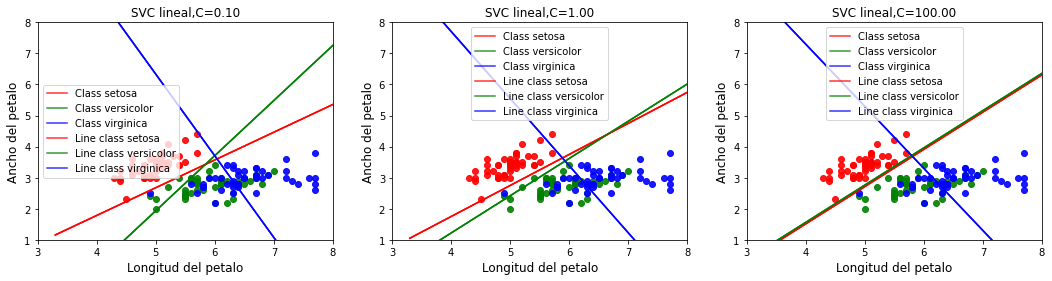

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, subejes=plt.subplots(1,3,figsize=(18,4))
for c,subeje in zip([0.1,1,100],subejes):
  clf=SVC(kernel='linear',C=c,random_state=67).fit(X_ent,y_ent)
  titulo='SVC lineal,C={:.2f}'.format(c)
  colors=['red','green','blue']
  for color,i,target in zip(colors,[0,1,2],iris.target_names):
    subeje.scatter(X_ent[y_ent==i,0],X_ent[y_ent==i,1],color=color,label=target,alpha=.9)
    subeje.set_xlabel('Longitud del petalo',fontsize=12);
    subeje.set_ylabel('Ancho del petalo',fontsize=12)
    subeje.set_title(titulo)

    for w,b,color in zip(clf.coef_,clf.intercept_,['red','green','blue']):
      x_min,x_max=X_ent[:,0].min()-1,X_ent[:,0].max()+1
      h=(x_max/x_min)/100
      xx=np.arange(x_min,x_max,h)
      pendiente=-w[0]/w[1]
      yy=pendiente*xx-(b/w[1])
      subeje.plot(xx,yy,c=color,alpha=0.8)
      subeje.legend(['Class setosa','Class versicolor','Class virginica',
                     'Line class setosa','Line class versicolor','Line class virginica'],loc='best')
      subeje.set_xlim(3,8)
      subeje.set_ylim(1,8)

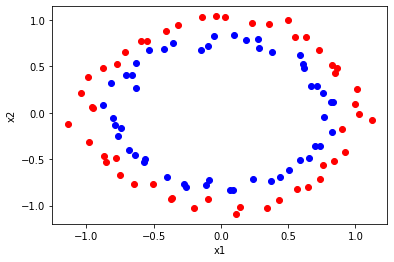

In [ ]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=100,noise=0.05)
rgb=np.array(['r','b'])
for i in range(2):
  plt.scatter(X[y==i,0],X[y==i,1],label='clase'+format(i),color=rgb[i])
  plt.xlabel("x1")
  plt.ylabel("x2")

Básicamente la K determina que tipo de hiperplano utilizar para separar las clases. La idea es entonces, probar con varios tipos de kernel e ir variando el valor de la variable C a fin de encontrar la mejor separación de los datos y por supuesto una mejor exactitud en la clasificación. Tenga en cuenta que un C muy grande puede implicar una mayor complejidad y alto sobre ajuste, mientras que un C pequeño una menor complejidad evidencia en un alto sub ajuste.
Considera los datos de la grafica de arriba si intentamos utilizar un kernel lineal obtendríamos una exactitud e 80% en la clasificación, lo cual nos demuestra que este kernel no es el adecuado para este caso, podemos comprobar lo dicho si ejecutamos el siguiente código:


In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
iris = datasets.load_iris()
X=iris.data[:,[1,1]] 
y=iris.target
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.1, random_state=1) 
svc=SVC(kernel='linear', C = 160, random_state=1) 
svc.fit(X_ent, y_ent) 
y_pred=svc.predict(X_pru) 
print("Exactitud:", format(accuracy_score(y_pru, y_pred) * 100))

Exactitud: 60.0


In [ ]:
from numpy.random.mtrand import gamma
from math import degrees
from pandas.core.common import random_state
import pandas as pd 
from sklearn.svm import SVC
import seaborn as sns

from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.1, random_state=1) 
svc = SVC(kernel='linear', C=1, random_state=1) 
svc.fit(X_ent, y_ent) 
y_pred=svc.predict(X_pru) 
print("Exactitud:", format(accuracy_score(y_pru, y_pred)*100))

svc=SVC(kernel='rbf', C=4, random_state=1, degree=3, gamma='auto')
svc.fit(X_ent,y_ent)
y_pred=svc.predict(X_pru)
print("exactitud:" ,format(accuracy_score(y_pru,y_pred)*100))

Exactitud: 60.0
exactitud: 60.0
